In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from scipy.stats import shapiro,kstest,normaltest,skew
import pickle

# 1.problem statement

problem statment : to predict the mobile price by using given information in csv file
    

# 2.Data Gathering

In [2]:
df=pd.read_csv("mobileinfo.csv")
df

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


# 3.EDA and feature engineering

### 3.1 Product_id

In [3]:
#df.info()
df['Product_id'].value_counts()

66      2
1062    2
832     2
133     2
827     2
       ..
203     1
10      1
622     1
40      1
856     1
Name: Product_id, Length: 83, dtype: int64

In [4]:
df.drop("Product_id",axis=1,inplace=True)

### 3.2 Price 

In [5]:
#df.info()
df['Price'].isna().sum()

0

### 3.3 Sale 

In [6]:
#df.info()
df['Sale'].isna().sum()

0

### 3.4 weight 

In [7]:
#df.info()
df['weight'].isna().sum()

0

### 3.5  resoloution

In [8]:
#df.info()
df['resoloution'].isnull().sum()

0

### 3.6  ppi 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         161 non-null    int64  
 1   Sale          161 non-null    int64  
 2   weight        161 non-null    float64
 3   resoloution   161 non-null    float64
 4   ppi           161 non-null    int64  
 5   cpu core      161 non-null    int64  
 6   cpu freq      161 non-null    float64
 7   internal mem  161 non-null    float64
 8   ram           161 non-null    float64
 9   RearCam       161 non-null    float64
 10  Front_Cam     161 non-null    float64
 11  battery       161 non-null    int64  
 12  thickness     161 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 16.5 KB


### 3.7cpu core

In [10]:
#df.info()

### 3.8 cpu freq 

In [11]:
#df.info()
df['cpu freq'].isnull().sum()

0

### 3.9 internal mem

In [12]:
#df.info()
df['internal mem'].isna().sum()

0

### 3.10 ram 

In [13]:
#df.info()
df['ram'].isna().sum()

0

### 3.11  RearCam 

In [14]:
#df.info()
df['RearCam'].isna().sum()

0

### 3.12 Front_Cam

In [15]:
#df.info()
df['Front_Cam'].isna().sum()

0

### 3.13 battery 

In [16]:
#df.info()

### 3.14 thickness

In [17]:
#df.info()
df['thickness'].isna().sum()

0

In [18]:
df.empty

False

## feature engineering

impute the missing value
outliers
encoding 
1.one hot encoding 
2.label encoding
transformation

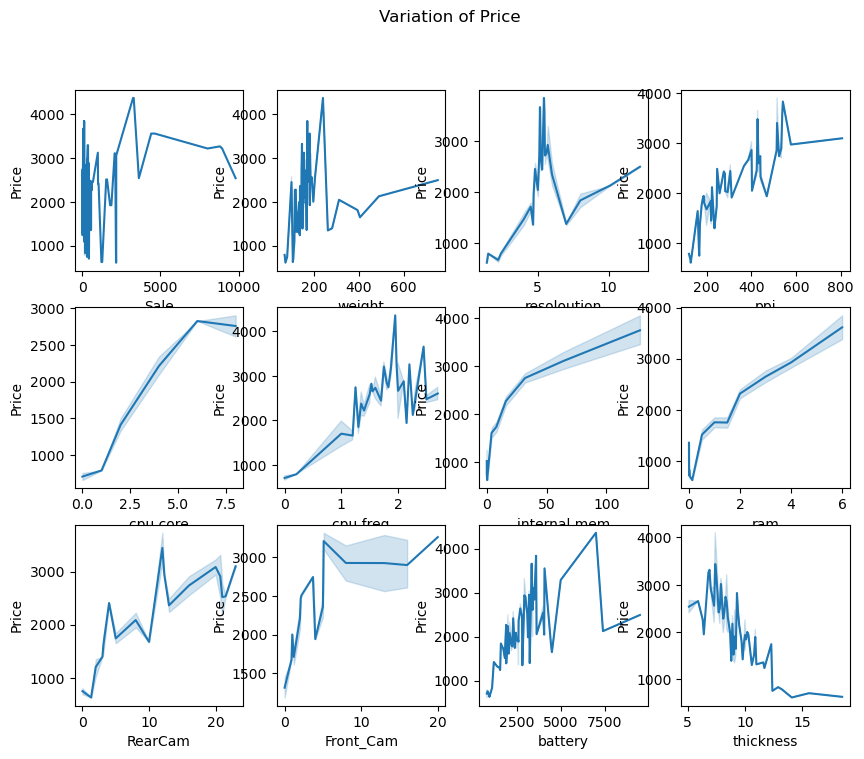

In [19]:
fig = plt.figure(figsize=(10,8))
fig.suptitle('Variation of Price')
plt.subplot(3,4,1)
sns.lineplot(x=df.Sale, y=df.Price)
plt.subplot(3,4,2)
sns.lineplot(x=df.weight, y=df.Price)
plt.subplot(3,4,3)
sns.lineplot(x=df.resoloution, y=df.Price)
plt.subplot(3,4,4)
sns.lineplot(x=df.ppi, y=df.Price)
plt.subplot(3,4,5)
sns.lineplot(x=df['cpu core'], y=df.Price)
plt.subplot(3,4,6)
sns.lineplot(x=df['cpu freq'], y=df.Price)
plt.subplot(3,4,7)
sns.lineplot(x=df['internal mem'], y=df.Price)
plt.subplot(3,4,8)
sns.lineplot(x=df['ram'], y=df.Price)
plt.subplot(3,4,9)
sns.lineplot(x=df['RearCam'], y=df.Price)
plt.subplot(3,4,10)
sns.lineplot(x=df['Front_Cam'], y=df.Price)
plt.subplot(3,4,11)
sns.lineplot(x=df['battery'], y=df.Price)
plt.subplot(3,4,12)
sns.lineplot(x=df['thickness'], y=df.Price)   
plt.show()

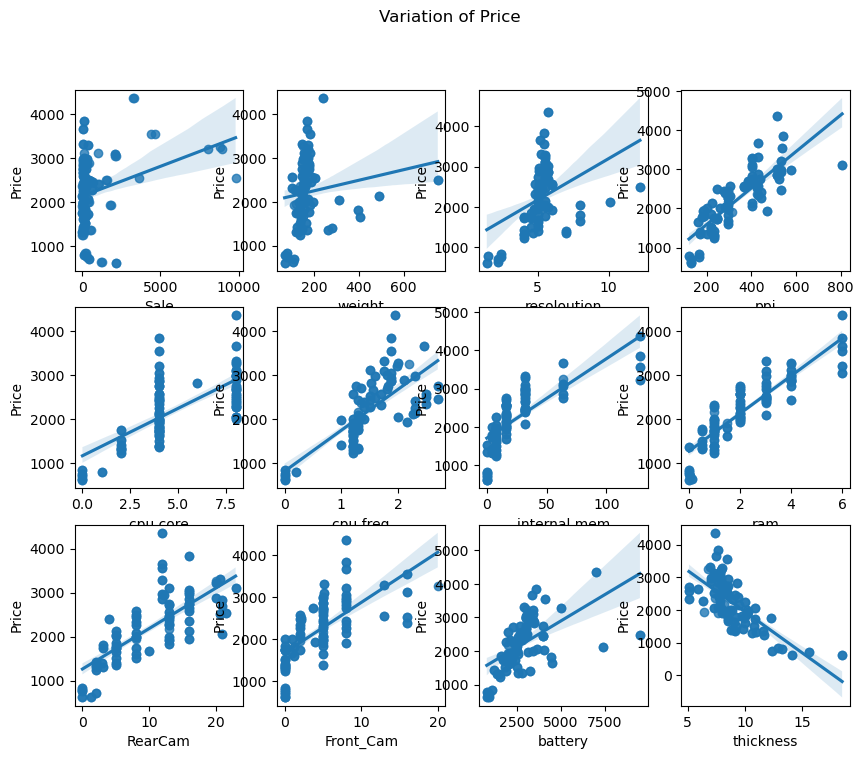

In [20]:
fig = plt.figure(figsize=(10,8))
fig.suptitle('Variation of Price')
plt.subplot(3,4,1)
sns.regplot(x=df.Sale, y=df.Price)
plt.subplot(3,4,2)
sns.regplot(x=df.weight, y=df.Price)
plt.subplot(3,4,3)
sns.regplot(x=df.resoloution, y=df.Price)
plt.subplot(3,4,4)
sns.regplot(x=df.ppi, y=df.Price)
plt.subplot(3,4,5)
sns.regplot(x=df['cpu core'], y=df.Price)
plt.subplot(3,4,6)
sns.regplot(x=df['cpu freq'], y=df.Price)
plt.subplot(3,4,7)
sns.regplot(x=df['internal mem'], y=df.Price)
plt.subplot(3,4,8)
sns.regplot(x=df['ram'], y=df.Price)
plt.subplot(3,4,9)
sns.regplot(x=df['RearCam'], y=df.Price)
plt.subplot(3,4,10)
sns.regplot(x=df['Front_Cam'], y=df.Price)
plt.subplot(3,4,11)
sns.regplot(x=df['battery'], y=df.Price)
plt.subplot(3,4,12)
sns.regplot(x=df['thickness'], y=df.Price)   
plt.show()

observation: all feetures are linertiy relationship.only thichness is negative side 

# 4 Feature selection

1.filter method
in this assumption for linear regreesion
1.linearity(before training the model)
2.no multicolinearity(before training the model)
3.normality of residuals(after training the model)
4.homoscadasticity(after training the model)

2.wrapper method
1.forward feature selection 
2.backwardfeature selection
3.RFE

3.embbeded method
regularization

### 4.1 linearity

In [22]:
df.corr()

,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
Price,1.000000,0.273263,0.144555,0.404010,0.817614,0.686811,0.727383,0.776738,0.896915,0.739538,0.675286,0.559946,-0.716773
Sale,0.273263,1.000000,0.016114,0.017154,0.235896,0.069517,0.099133,0.489308,0.373127,0.292164,0.437233,0.120338,-0.047991
weight,0.144555,0.016114,1.000000,0.890416,-0.054683,0.216257,0.222730,0.098849,0.149283,-0.029448,-0.005971,0.833783,-0.185262
resoloution,0.404010,0.017154,0.890416,1.000000,0.181292,0.472226,0.505454,0.202660,0.327216,0.249892,0.202720,0.843462,-0.533708
ppi,0.817614,0.235896,-0.054683,0.181292,1.000000,0.487990,0.713168,0.618560,0.748724,0.774008,0.491371,0.302517,-0.496791
cpu core,0.686811,0.069517,0.216257,0.472226,0.487990,1.000000,0.491519,0.276251,0.483128,0.611353,0.586698,0.459728,-0.697935
cpu freq,0.727383,0.099133,0.222730,0.505454,0.713168,0.491519,1.000000,0.441400,0.633547,0.625104,0.358319,0.473137,-0.614458
internal mem,0.776738,0.489308,0.098849,0.202660,0.618560,0.276251,0.441400,1.000000,0.875354,0.451917,0.555733,0.461506,-0.367412
ram,0.896915,0.373127,0.149283,0.327216,0.748724,0.483128,0.633547,0.875354,1.000000,0.648073,0.647470,0.541001,-0.521074
RearCam,0.739538,0.292164,-0.029448,0.249892,0.774008,0.611353,0.625104,0.451917,0.648073,1.000000,0.596374,0.287821,-0.550998


In [ ]:
df.corr().head(1)

<Axes: >

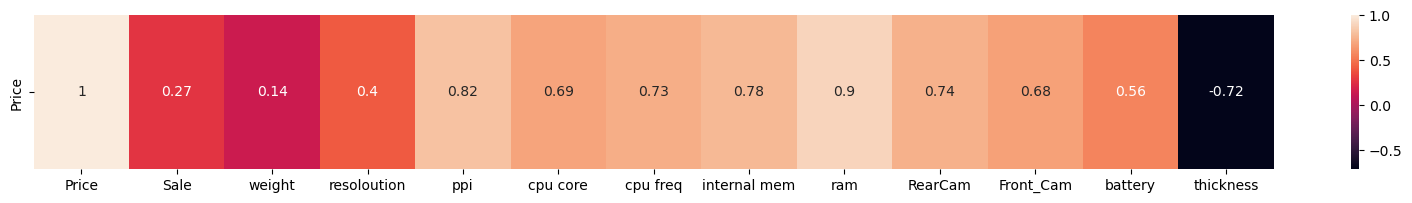

In [23]:
plt.figure(figsize=(20,2))
sns.heatmap(df.corr().head(1),annot=True)


In [ ]:
#sns.pairplot(df)

In [24]:
x=df.drop("Price",axis=1)


In [25]:
vif_list=[variance_inflation_factor(x.to_numpy(),i) for i in range(x.shape[1])]
vif_list

[2.046093549640833,
 63.30509123096094,
 113.76194501360314,
 32.58655894939987,
 14.557883248628873,
 27.887918512179404,
 11.74228298379985,
 26.782571527071322,
 14.537315677649225,
 5.780145363801801,
 50.477631369027286,
 8.80323199683389]

In [26]:
vif_values=pd.Series(vif_list,index=x.columns)
vif_values

Sale              2.046094
weight           63.305091
resoloution     113.761945
ppi              32.586559
cpu core         14.557883
cpu freq         27.887919
internal mem     11.742283
ram              26.782572
RearCam          14.537316
Front_Cam         5.780145
battery          50.477631
thickness         8.803232
dtype: float64

<Axes: >

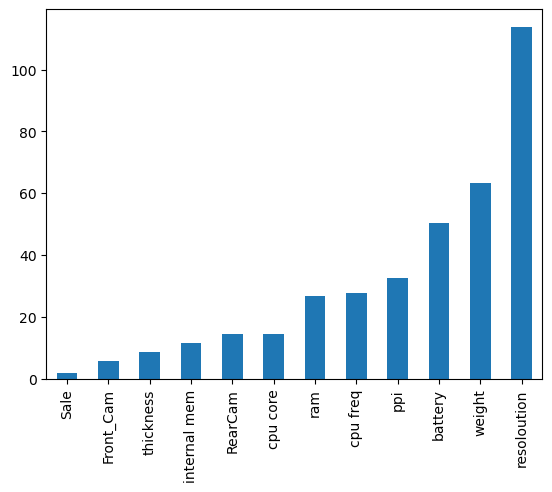

In [27]:
vif_values.sort_values().plot(kind='bar')

# 5.Model training 

In [31]:
x=df.drop("Price",axis=1)
y=df['Price']

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=16)
x_train

,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
87,119,167.8,5.43,541,4,1.875,128.000,6.000,16.0,8.0,3600,7.6
77,101,279.0,7.00,170,4,1.200,4.000,1.000,3.0,0.0,3240,9.0
63,71,97.0,4.80,306,8,1.700,16.000,1.000,8.0,5.0,2100,5.1
91,143,154.0,5.00,294,4,1.200,8.000,1.000,13.0,5.0,2100,8.4
118,373,169.0,5.50,403,8,1.350,16.000,2.000,21.0,5.0,3630,10.9
...,...,...,...,...,...,...,...,...,...,...,...,...
125,423,110.0,2.20,128,0,0.000,0.128,0.032,2.0,0.0,900,15.6
123,399,194.8,5.70,258,4,1.200,16.000,2.000,8.0,1.0,3400,10.2
65,73,175.0,5.50,401,6,1.530,32.000,3.000,21.0,8.0,3500,9.3
69,87,97.0,4.80,306,8,1.700,16.000,1.000,8.0,5.0,2100,5.1


### instancing linear regression

In [29]:
linear_reg=LinearRegression()
linear_reg

LinearRegression()

In [33]:
linear_reg.fit(x_train,y_train) # gradient descent algorithm in back end

LinearRegression()

In [ ]:
linear_reg.coef_

In [ ]:
linear_reg.intercept_

In [ ]:
linear_reg.n_features_in_


# 6 Model Evaluation

In [34]:
y_pred=linear_reg.predict(x_test)

### testing data evaluation

In [35]:
mse=mean_squared_error(y_test,y_pred)
print("mean sqaured error: ",mse)

rmse=np.sqrt(mse)
print("root mean sqaured error: ",rmse)

mae=mean_absolute_error(y_test,y_pred)
print("mean absolute error: ",mae)

r_sqaured=r2_score(y_test,y_pred)
print("r_sqaured values: ",r_sqaured)

n=x_test.shape[0]
k=x_test.shape[1]

adj_r2=1-((1-r_sqaured)*(n-1))/(n-k-1)
print("adjusted r2 values: ",adj_r2)

mean sqaured error:  37369.63154251221
root mean sqaured error:  193.31226433548443
mean absolute error:  147.54704475786755
r_sqaured values:  0.9240268852547493
adjusted r2 values:  0.8784430164075989


### training data evalution

In [37]:
y_pred_train=linear_reg.predict(x_train)

In [38]:
mse=mean_squared_error(y_train,y_pred_train)
print("mean sqaured error: ",mse)

rmse=np.sqrt(mse)
print("root mean sqaured error: ",rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print("mean absolute error: ",mae)

r_sqaured=r2_score(y_train,y_pred_train)
print("r_sqaured values: ",r_sqaured)

n=x_train.shape[0]
k=x_train.shape[1]

adj_r2=1-((1-r_sqaured)*(n-1))/(n-k-1)
print("adjusted r2 values: ",adj_r2)

mean sqaured error:  25201.30811062225
root mean sqaured error:  158.74919877159144
mean absolute error:  133.63102313029546
r_sqaured values:  0.9586110585379877
adjusted r2 values:  0.9542922124723864


### Assumption of linear regreesion after training the model

### 3.normality of residuals


In [40]:
residuals=y_test -y_pred

### to check normality by visulization

<Axes: xlabel='Price', ylabel='Density'>

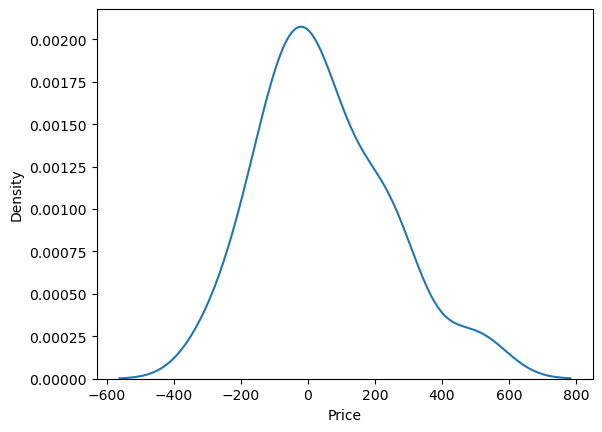

In [41]:
sns.kdeplot(residuals)

In [ ]:
sns.histplot(residuals)

In [ ]:
sns.distplot(residuals)

### normality check by QQplot

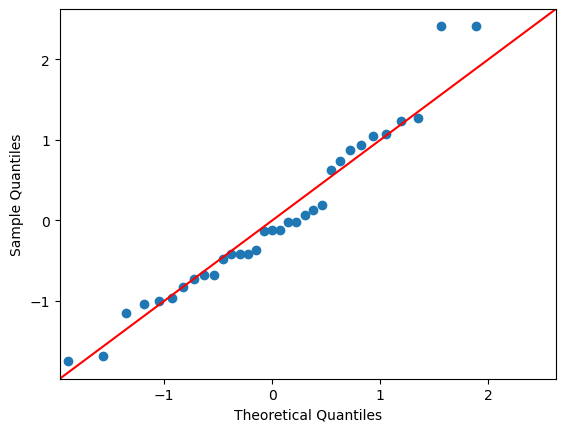

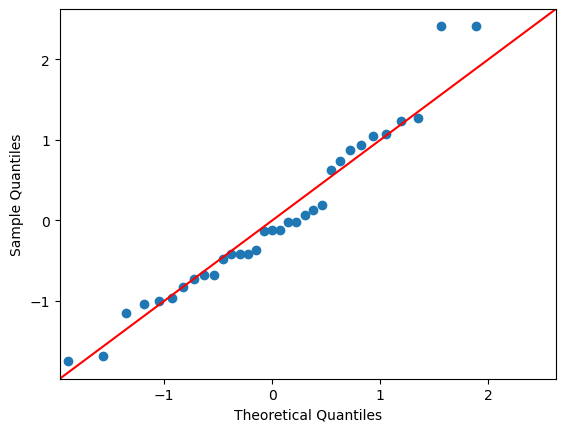

In [42]:
sm.qqplot(residuals,line='45',fit=True)

### to check normality by hypothesis testing

### 1.shapiro

In [43]:
_,p_val=shapiro(residuals)
print("p_values: ",p_val)
if p_val>=0.05:
    print("data is normally distributed")
    print("null hypothesis is true")
    
else:
    print("data is not normally distributed")
    print("alternate hypothesis is true")

p_values:  0.1863938570022583
data is normally distributed
null hypothesis is true


### 2.kstest

In [ ]:
_,p_val=kstest(residuals,'norm')
print("p_values: ",p_val)
if p_val>=0.05:
    print("data is normally distributed")
    print("null hypothesis is true")
    
else:
    print("data is not normally distributed")
    print("alternate hypothesis is true")

### 3.normaltest

In [ ]:
_,p_val=normaltest(residuals)
print("p_values: ",p_val)
if p_val>=0.05:
    print("data is normally distributed")
    print("null hypothesis is true")
    
else:
    print("data is not normally distributed")
    print("alternate hypothesis is true")

### 4. to check normality of residuals by Skewness

In [44]:
mean=residuals.mean()
print("mean: ",mean)

median=residuals.median()
print("median: ",median)

skew=residuals.skew()
print("skew: ",skew)

if mean > median:
    print("data is positively skewed")
    print("skew: ",skew)
elif mean <median:
    print("data is negatively skewed")
    print("skew: ",skew)
else:
    print("data is symmetric")
    print("skew: ",skew)

mean:  48.20823163585787
median:  26.22322416067027
skew:  0.6332421279474597
data is positively skewed
skew:  0.6332421279474597


## 4.homoscadasticity

In [45]:
residual_train=y_train - y_pred_train
residual_train

87     125.397422
77    -120.709505
63    -110.342365
91     -27.999990
118   -264.053854
          ...    
125     70.962726
123    126.484528
65     242.606461
69    -109.952318
121   -263.761319
Name: Price, Length: 128, dtype: float64

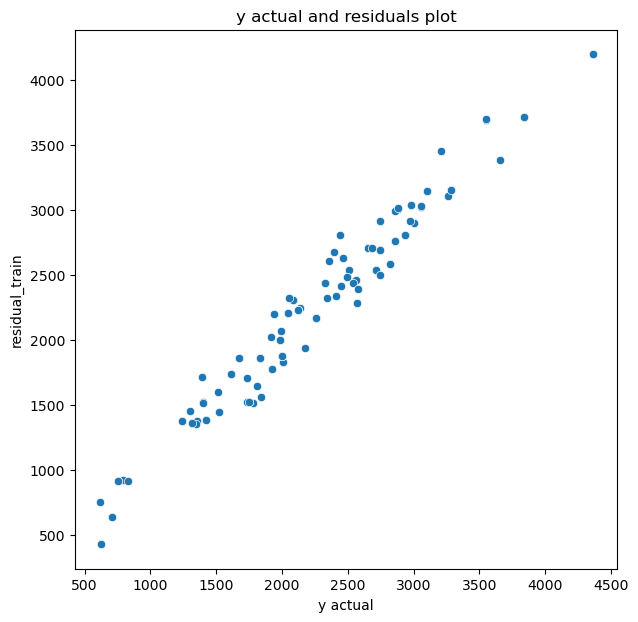

In [46]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=y_train,y=y_pred_train)
plt.xlabel("y actual")
plt.ylabel("residual_train")
plt.title("y actual and residuals plot")
plt.savefig('mobilescatterplot.png')

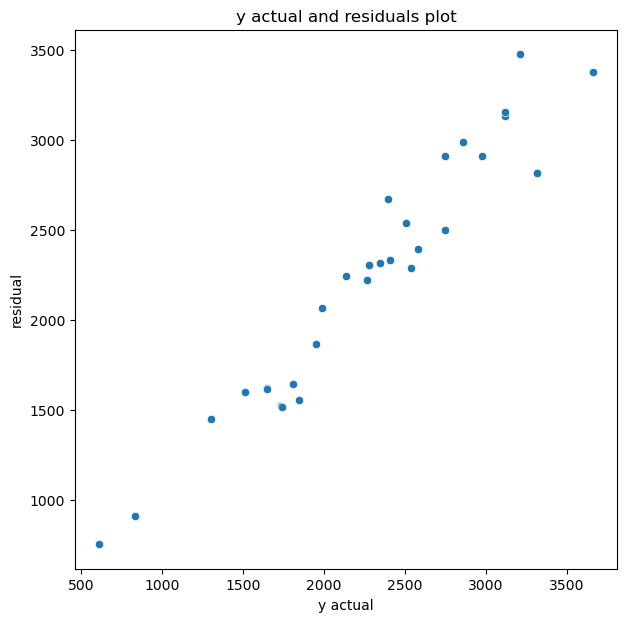

In [47]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel("y actual")
plt.ylabel("residual")
plt.title("y actual and residuals plot")
plt.savefig('mobilescatterplot.png')

In [ ]:
x_test.head(1).T

In [ ]:

Sale=45.00
weight=168.00
resoloution=5.15
ppi=428.00
cpu_core=8.00
cpu_freq=2.45
internal_mem=64.00
ram=6.00
RearCam=12.00
Front_Cam=25.00
battery=3350.00
thickness=7.50

In [ ]:
def get_mobile_price(Sale,weight,resoloution,ppi,cpu_core,cpu_freq,internal_mem,ram,RearCam,Front_Cam,battery,thickness):

    test_array=np.array([Sale,weight,resoloution,ppi,cpu_core,cpu_freq,internal_mem,
                         ram,RearCam,Front_Cam,battery,thickness,],ndmin=2)
    pridected_price=np.around(linear_reg.predict(test_array)[0],3)
    return pridected_price
pridected_price=get_mobile_price(Sale,weight,resoloution,ppi,cpu_core,cpu_freq,
                                 internal_mem,ram,RearCam,Front_Cam,battery,thickness)
print("pridicted mobile price : ",pridected_price)


In [ ]:
with open("mobileinfo_linear_regession_model.pkl",'wb') as f:
    pickle.dump(linear_reg,f)